# Arima Model
* p = No.of terms to be Considered for AutoRegression (ACF)
* d = Number of Differencing
* q = No of Terms to be Considred for Moving Average (PACF)
* ARIMA(p,d,q)

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [50]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/Time Series - Basics(Data and Code)/shampoo.csv', header=0, parse_dates=[0])

In [51]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


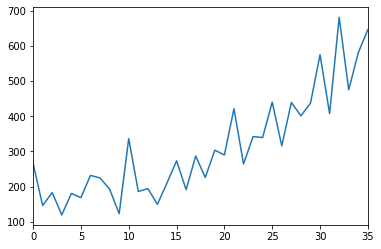

In [52]:
df.Sales.plot()

* Here we see that the trend is Polynomial. D=2

## Autocorrelation plot

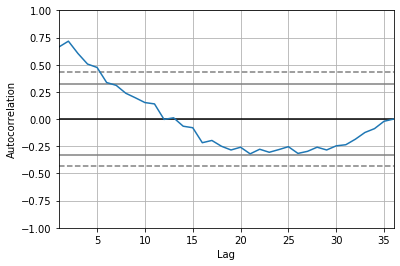

In [53]:
# For p value
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Sales)

* here the p value will be 5

## Partial Autocorrelation Plot

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf

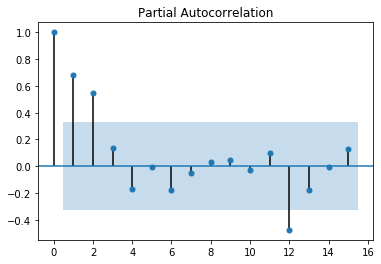

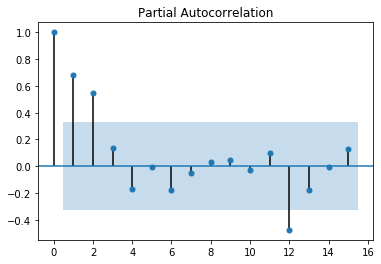

In [55]:
plot_pacf(df.Sales, lags=15)

* here we will consider q as 2

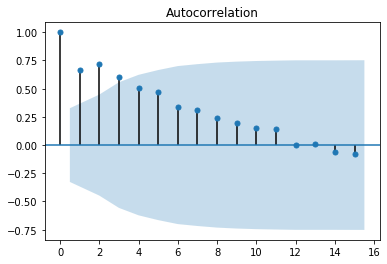

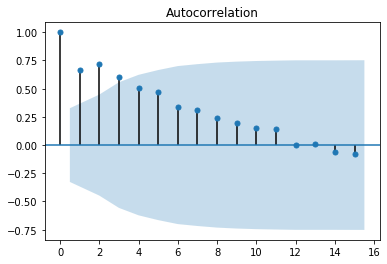

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Sales, lags=15)


In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
import statsmodels
statsmodels.__version__

'0.10.1'

In [59]:
model1 = ARIMA(df.Sales, order = (5,2,2))
model1_fit = model1.fit()

C:\Users\pravi\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [60]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.343
Date:                Fri, 05 Jun 2020   AIC                            396.067
Time:                        18:05:13   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.001       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1231      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6013      0.478     -3.353      0.002      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.018      -1.834      -0.229
ar.L5.D2.Sales    -0.3193      0.193     -1.653      0.110      -0.698       0.059
ma.L1.D2.Sales    -0.0002      0.120     -0.002      0.998      -0.235       0.234
ma.L2.D2.Sales    -0.9998      0.120     -8.363      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1409           -1.3030j            1.3106           -0.2329
AR.2            0.1409           +1.3030j            1.3106            0.2329
AR.3           -1.1313           -0.4225j            1.2076           -0.4431
AR.4           -1.1313           +0.4225j            1.2076            0.4431
AR.5           -1.2502           -0.0000j            1.2502           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0002           +0.0000j            1.0002            0.5000
-----------------------------------------------------------------------------
"""

In [61]:
residuals = model1_fit.resid

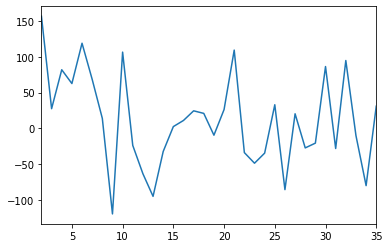

In [62]:

residuals.plot()

In [63]:
residuals.describe()

count     34.000000
mean      11.293855
std       65.989793
min     -119.295696
25%      -31.207155
50%       12.481503
75%       55.127849
max      156.383323
dtype: float64

### Variations
* ARIMA - 

model = ARIMA(data, order=(q,d,p))

* Autoregression -

model = ARIMA(data, order=(q,d,0))

* Moving Average - 

model = ARIMA(data, order=(0,d,p))

In [64]:
output = model1_fit.forecast()

In [65]:
output

(array([636.15148334]),
 array([54.34286347]),
 array([[529.64142812, 742.66153855]]))

In [66]:
model1_fit.forecast(5)

(array([636.15148334, 709.19180983, 664.3330911 , 771.11928552,
        761.60381712]),
 array([54.34286347, 55.28988149, 57.44408626, 58.17600278, 60.26109905]),
 array([[529.64142812, 742.66153855],
        [600.8256334 , 817.55798625],
        [551.74475091, 776.92143128],
        [657.0964153 , 885.14215573],
        [643.49423332, 879.71340093]]))